In [3]:
import os
import sys
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score # 
from arch import arch_model
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats as sms
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
#Taken from https://medium.com/auquan/time-series-analysis-for-financial-data-part-1-stationarity-autocorrelation-and-white-noise-1a1cc2fb23f2
#Helps in understanding the lagged terms (via plotting auto and partial-autocorrelation)
def tsplot(y, lags = None, name = 'empty',figsize = (15,10), style = 'bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize = figsize)
        layout = (3,2)
        ts_ax = plt.subplot2grid(layout,(0,0), colspan = 2)
        acf_ax = plt.subplot2grid(layout,(1,0))
        pacf_ax = plt.subplot2grid(layout,(1,1))
        qq_ax = plt.subplot2grid(layout, (2,0))
        pp_ax = plt.subplot2grid(layout, (2,1))
        
        y.plot(ax = ts_ax)
        ts_ax.set_title('Time Series Analysis Plots ' + name)
        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax, alpha = 0.05)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax, alpha = 0.05)
        sm.qqplot(y, line = 's', ax = qq_ax)
        qq_ax.set_title('QQ Plot')
        stats.probplot(y, sparams = (y.mean(), y.std()), plot = pp_ax)
        
        plt.tight_layout()
        plt.savefig(name + 'Arima.png')
    return

In [5]:
google = pd.read_csv("LoggedGoogleTrends.csv")
google.set_index('Unnamed: 0', inplace = True)
google.index.name = 'Date'
print(google.shape)
google.head()

(373, 5)


,gucci,patek,versace,balenciaga,saint laurent
Date,,,,,
2017-01-02,0.043314,-0.033416,-0.005265,0.069933,0.139433
2017-01-03,-0.030651,0.091183,-0.013582,0.015666,-0.012711
2017-01-04,-0.020743,-0.122410,0.010056,-0.042334,-0.023636
2017-01-05,0.053320,0.089374,0.000588,0.011644,-0.002281
2017-01-06,-0.004497,-0.066270,0.023831,0.055425,0.013606


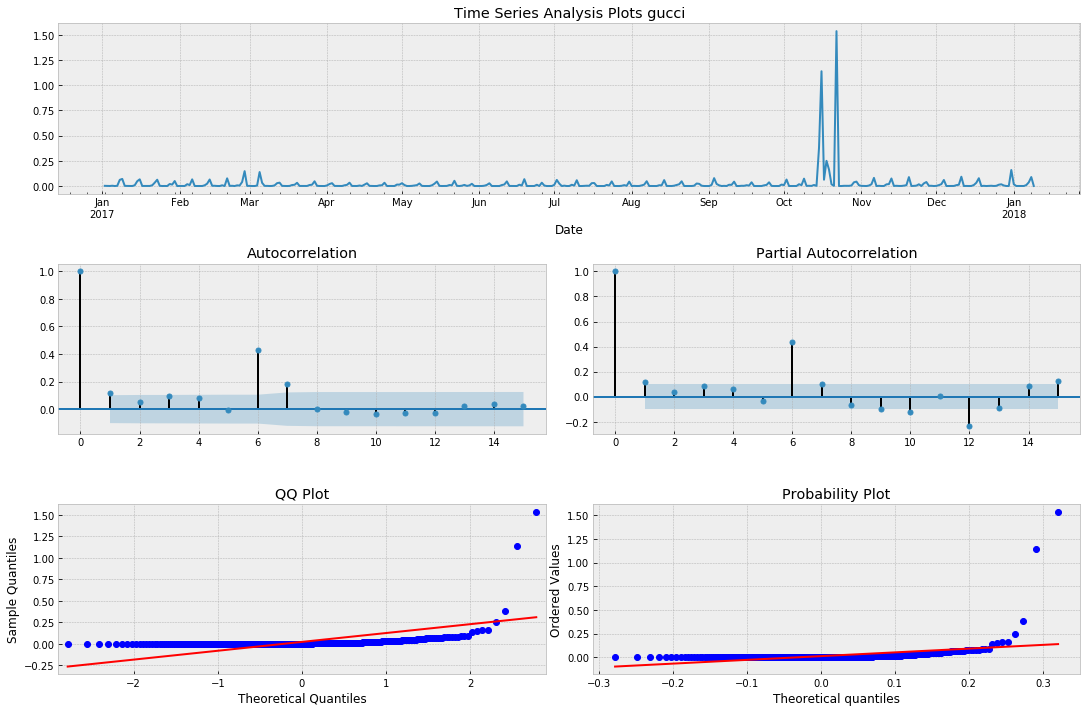

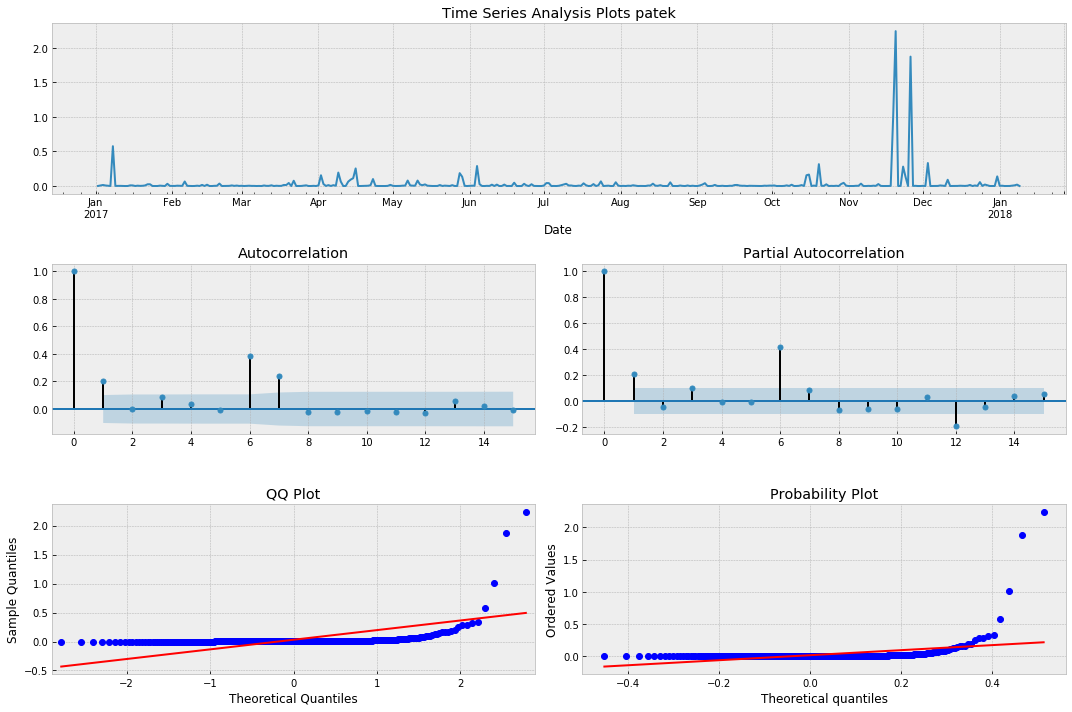

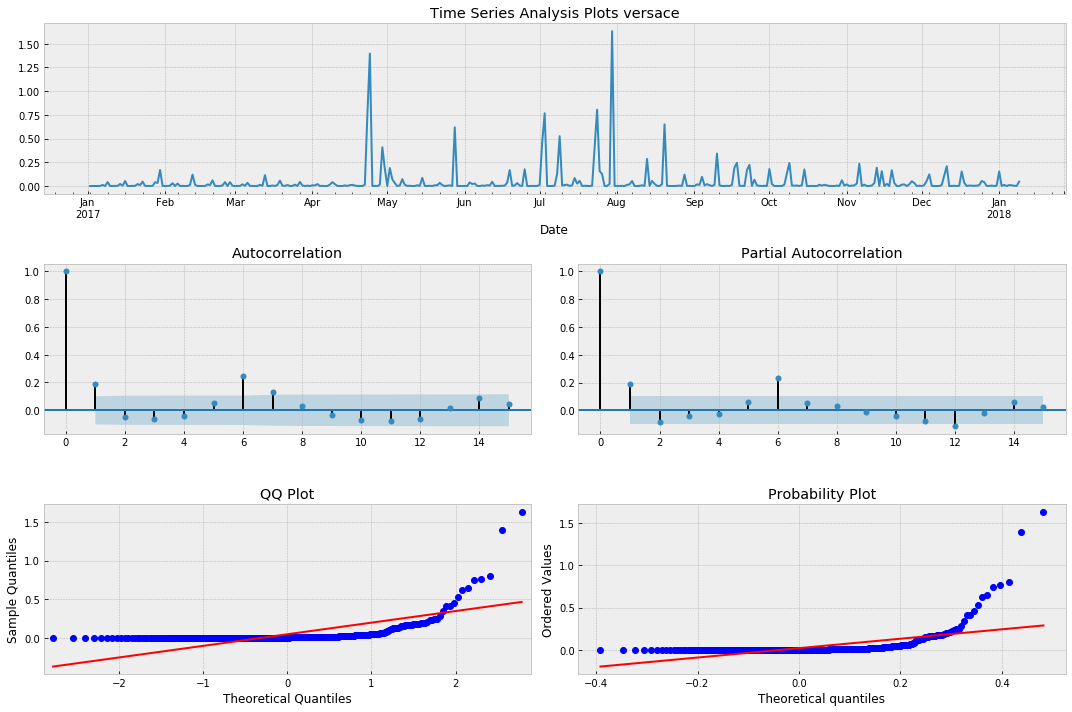

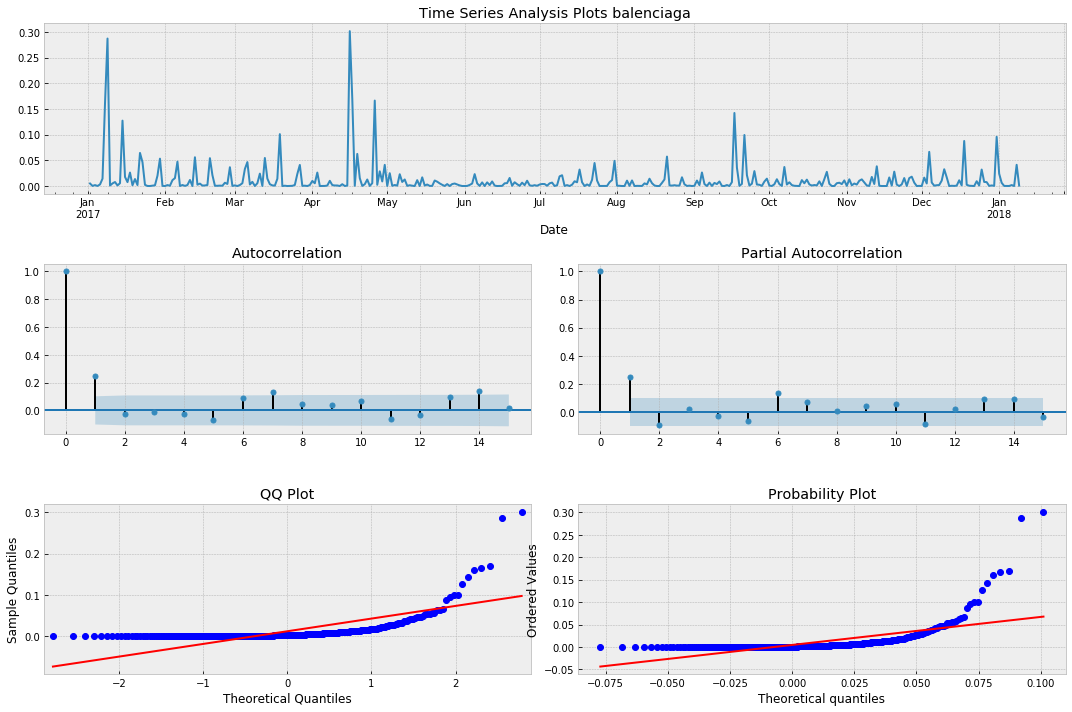

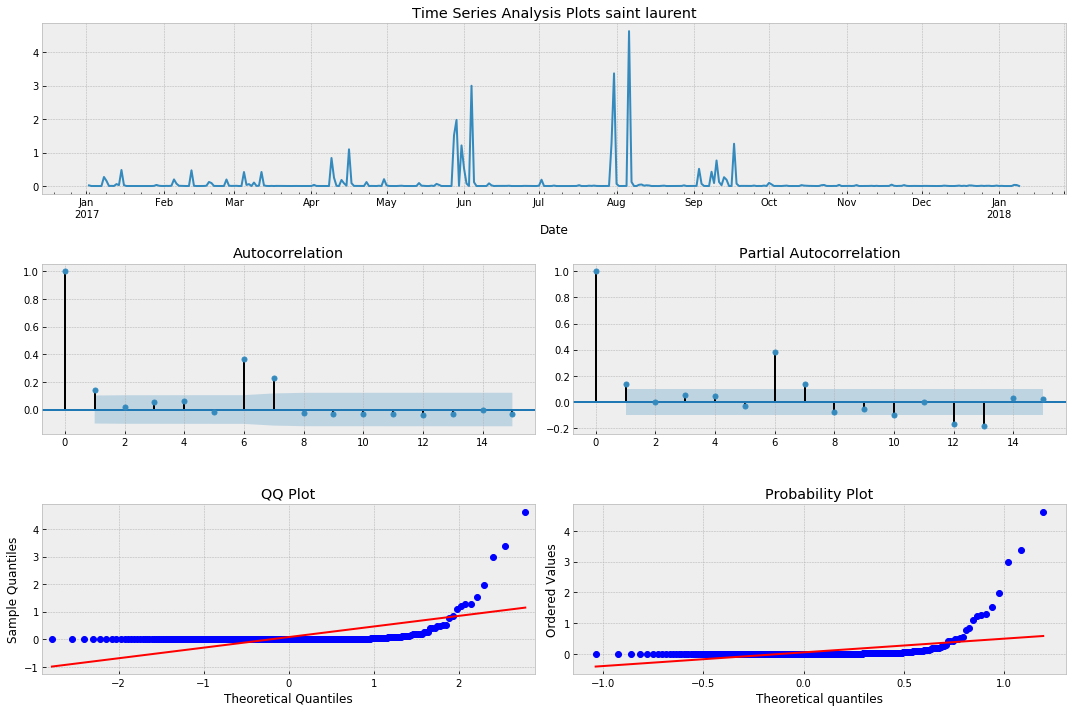

In [40]:
for column in google:
    tsplot(google[column]**2, lags = 15, name = column)

<Figure size 432x288 with 0 Axes>

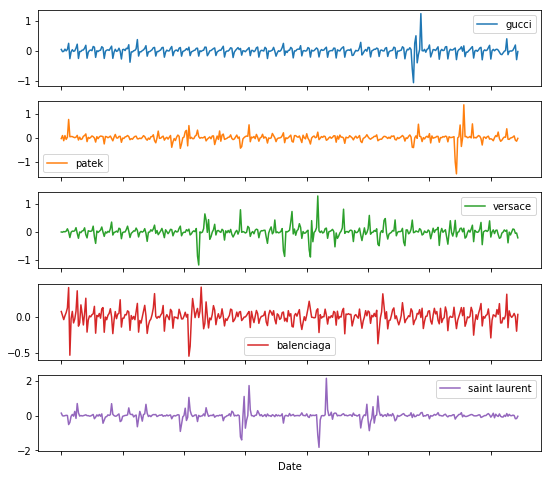

In [7]:
plt.figure(); google.plot(subplots = True, figsize = (9,9)); plt.legend(loc = 'best')

I think the ARIMA's should be as follows:
1. Gucci Arima(1, 0, 1)
2. Patek Arima(1, 0, 1)
3. Versace Arima(1, 0, 1)
4. Balenciaga Arima(1, 0, 1)
5. Saint Laurent Arima(1, 1, 1)

In [80]:
arima_input = {'gucci': (6, 1, 1), 'patek':(3, 1, 2),'versace':(2, 1, 1),
               'balenciaga':(1, 1, 1), 'saint laurent':(6, 1, 1)}

In [81]:
results_dict = {}
google.reset_index(inplace = True)
google['Date'] = pd.to_datetime(google['Date'])
google.set_index('Date', inplace = True)
date_range = pd.date_range(google.index[0], google.index[-1])

In [82]:
name = 'gucci'
ts = google[name]
results_dict[name] = smt.ARIMA(ts, order=arima_input[name] ).fit(method='mle', trend='nc')

C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [83]:
name = 'patek'
ts = google[name]
results_dict[name] = smt.ARIMA(ts, order=arima_input[name] ).fit(method='mle', trend='nc')

C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [84]:
name = 'versace'
ts = google[name]
results_dict[name] = smt.ARIMA(ts, order=arima_input[name] ).fit(method='mle', trend='nc')

C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [85]:
name = 'balenciaga'
ts = google[name]
results_dict[name] = smt.ARIMA(ts, order=arima_input[name] ).fit(method='mle', trend='nc')

C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [86]:
name = 'saint laurent'
ts = google[name]
results_dict[name] = smt.ARIMA(ts, order=arima_input[name] ).fit(method='mle', trend='nc')

C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\alexk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


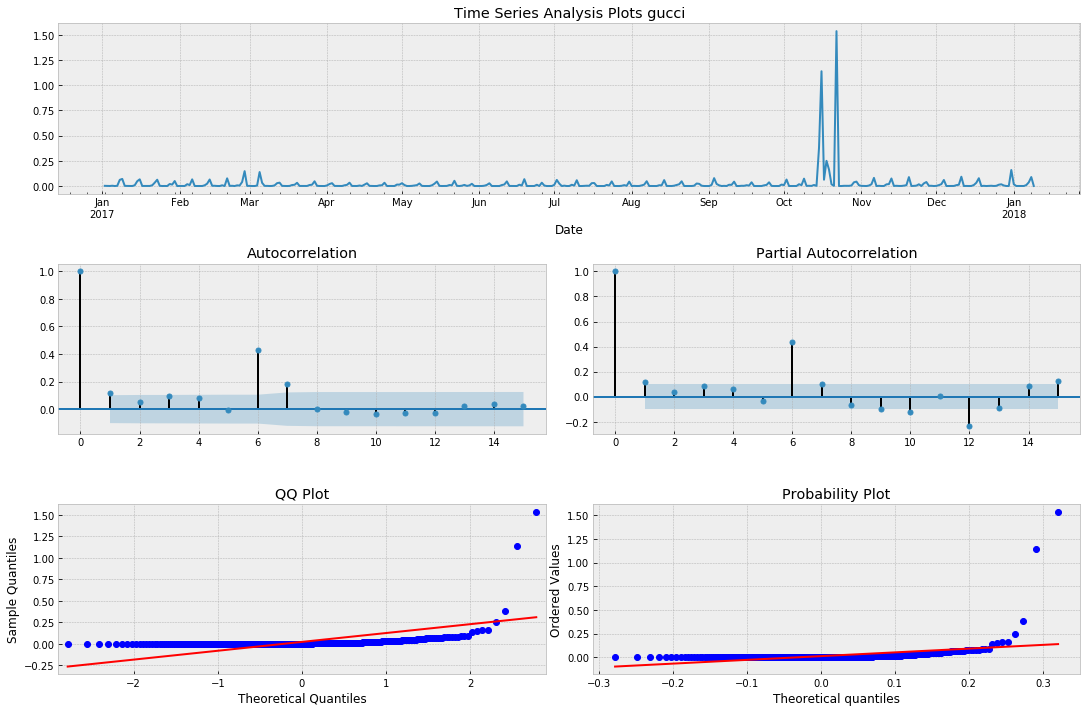

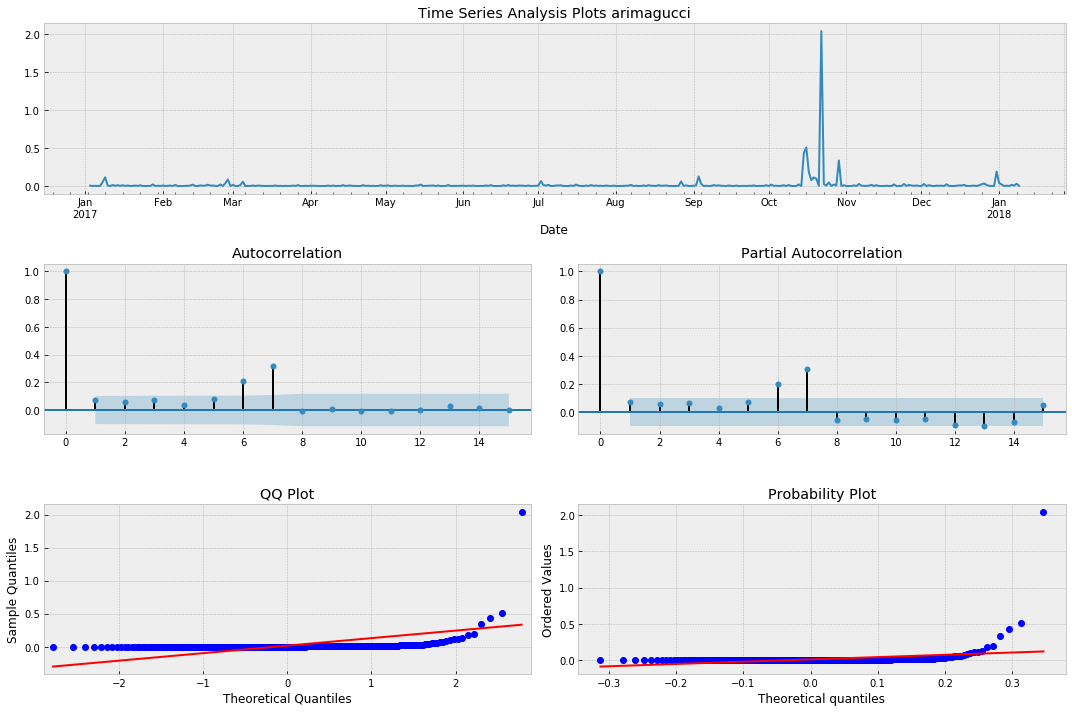

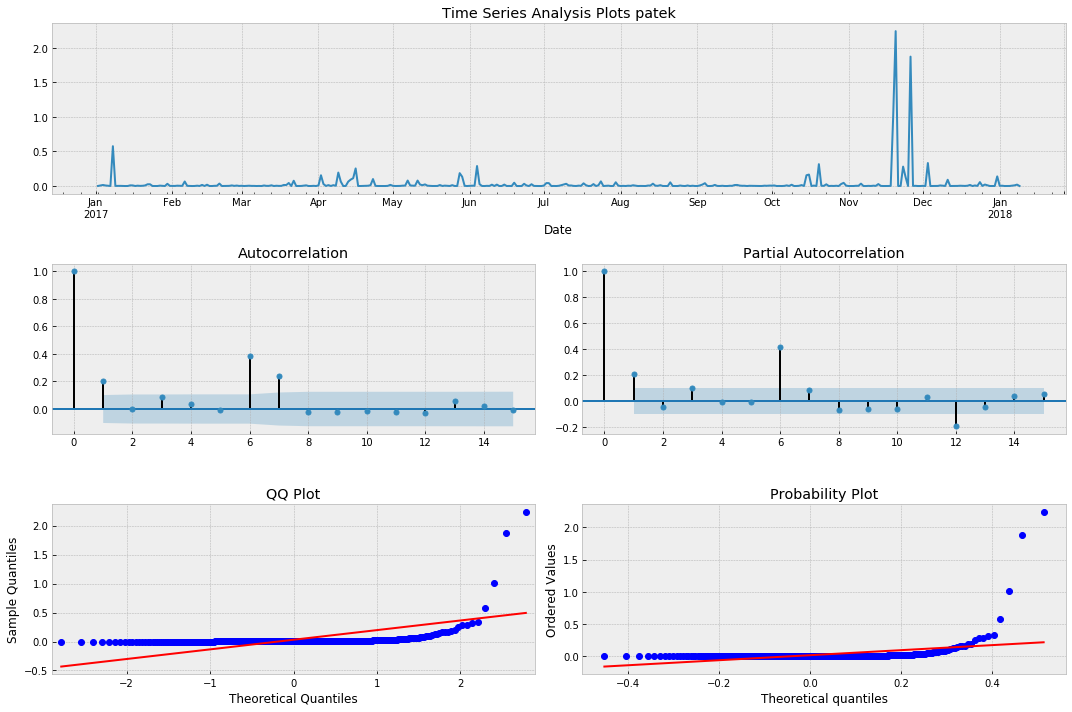

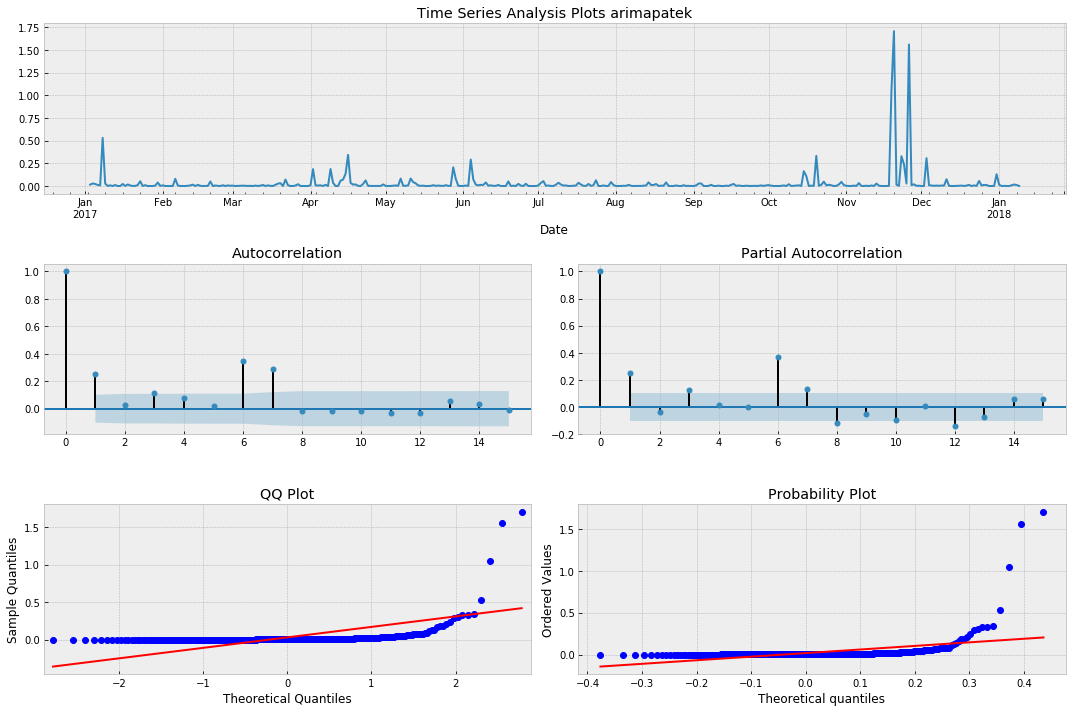

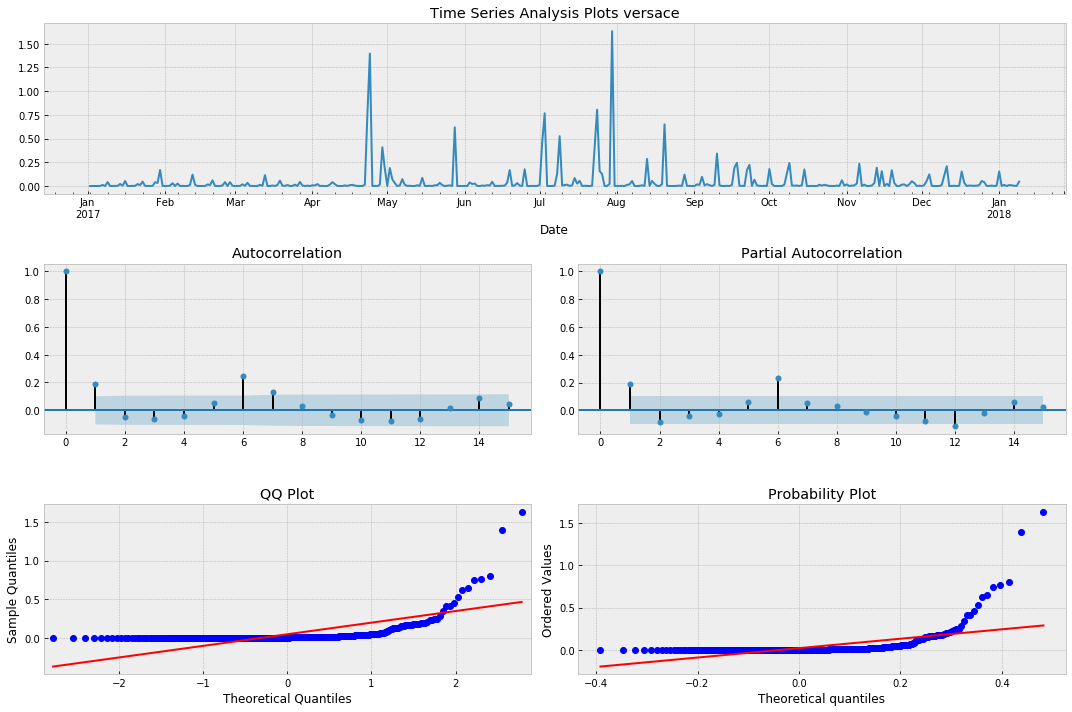

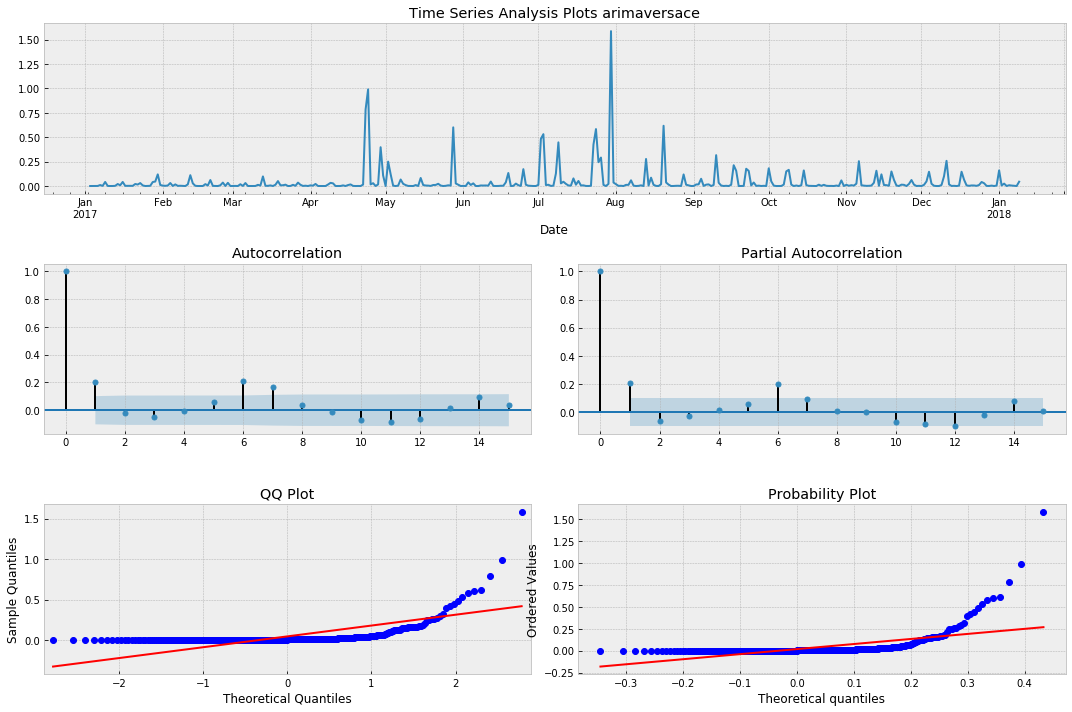

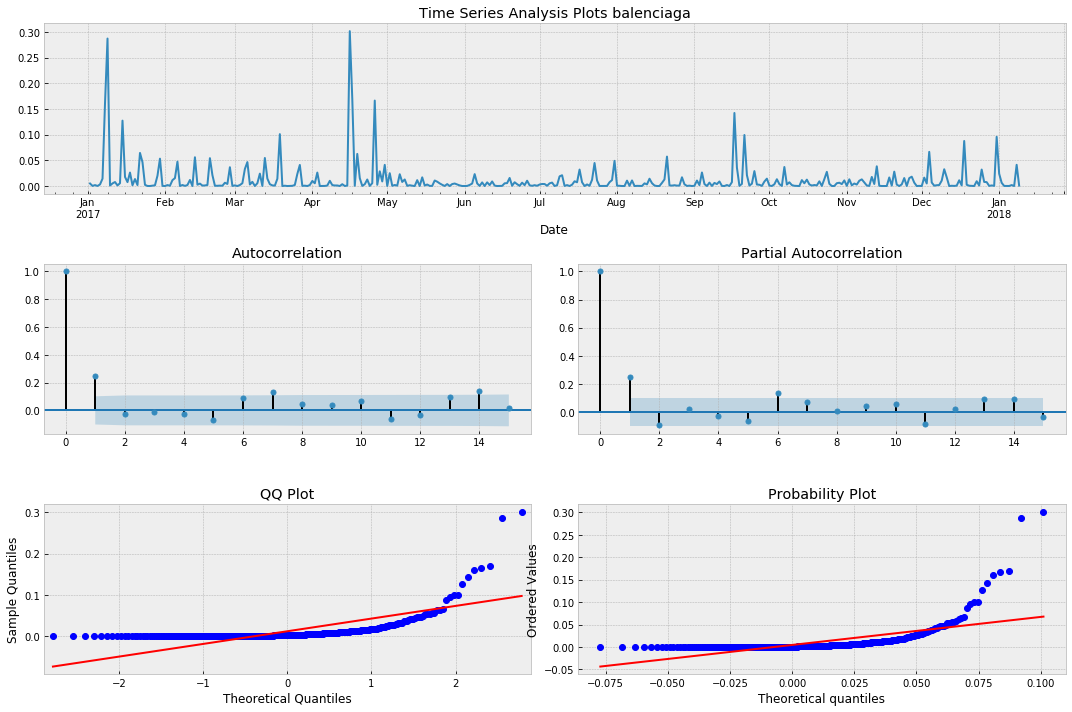

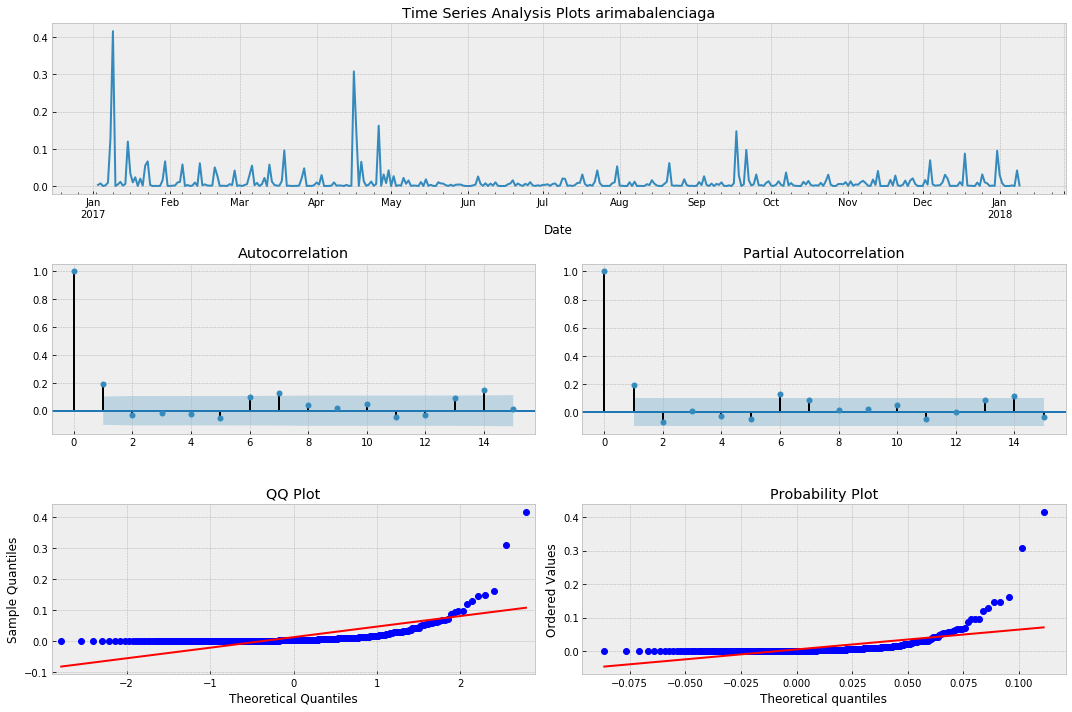

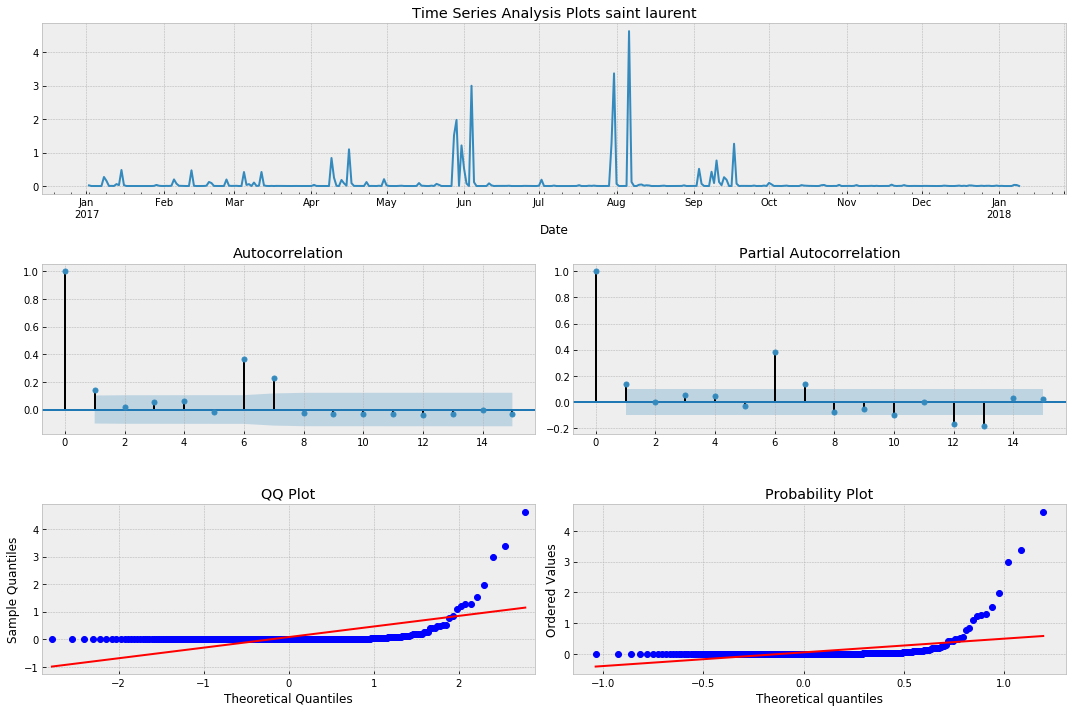

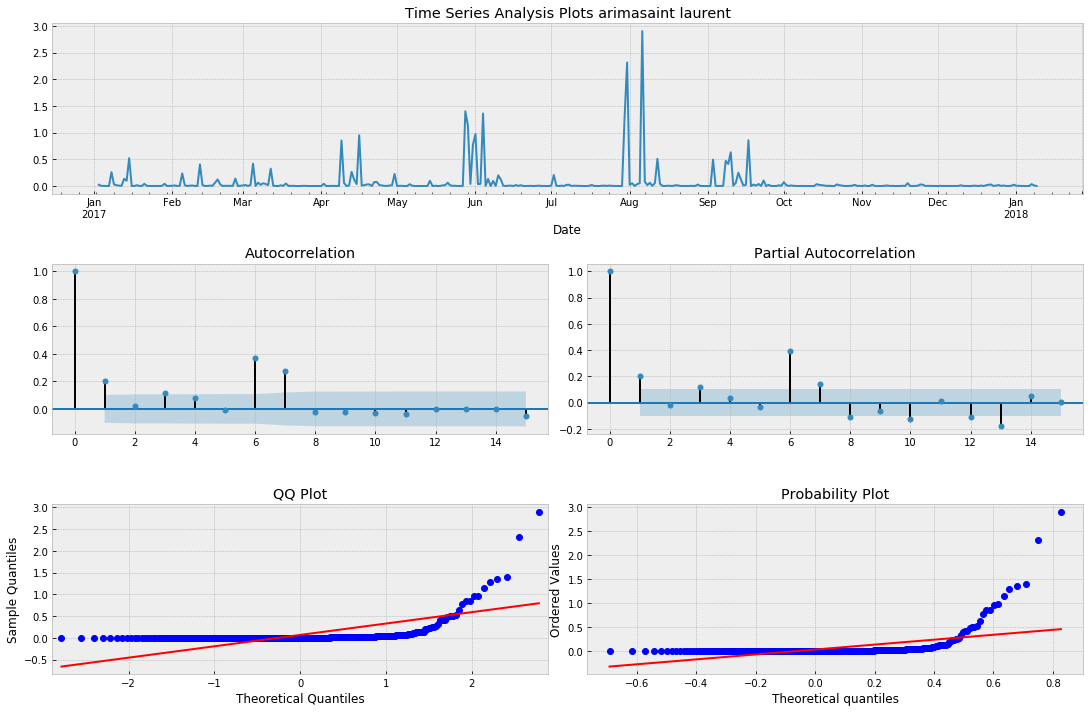

In [89]:
for key in results_dict.keys():
    tsplot(google[key]**2, lags = 15, name = key)
    tsplot(results_dict[key].resid**2, lags = 15, name = ('arima' + key))

In [ ]:
residual_df = pd.DataFrame()
for key in results_dict.keys():
    arr = results_dict[key].resid
    residual_df[key] = arr

In [ ]:
residual_df.set_index(google[1:].index, inplace = True)

In [ ]:
residual_df.head()

In [ ]:
residual_df.to_csv('ResidualGoogleSet.csv')

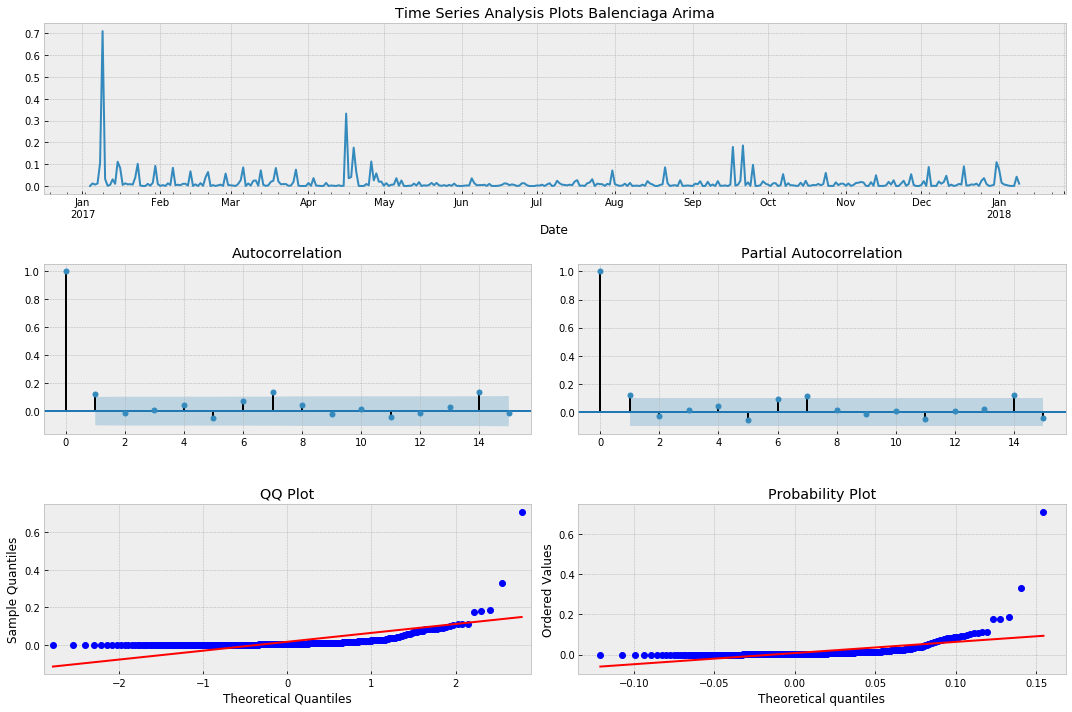

In [34]:
tsplot(results_dict['balenciaga'].resid**2, lags = 15, name = 'Balenciaga Arima')